# Importing Libraries


In [12]:

from pathlib import Path
import numpy as np
from scipy import signal
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import animation
import irutilities


# Importing dataset and visualization


Source position (m):  [2.  1.5 0. ]
Mic position (m):  [-0.5 -0.5 -0.2]


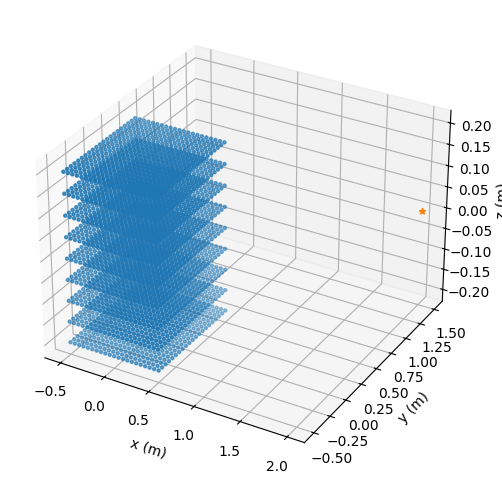

Time (sample): 8530


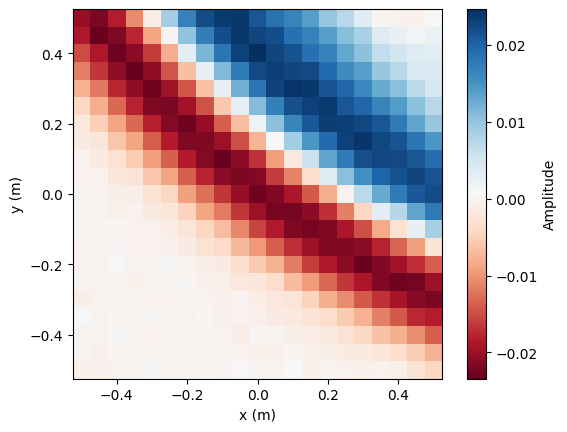

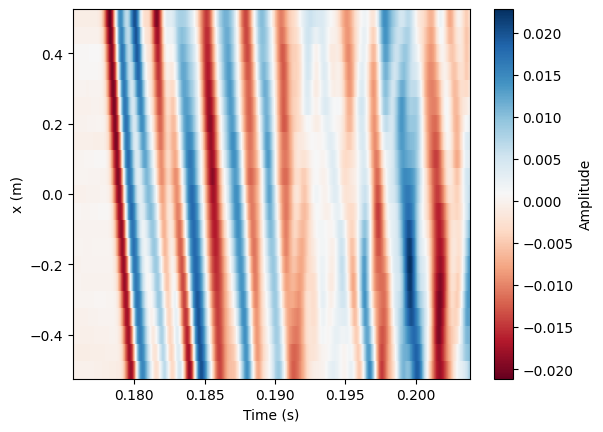

In [13]:

if __name__ == "__main__":
    sessionName = "S1-M3969_npy"  # "S1-M3969_npy"
    import os
    if '__file__' in globals():
        sessionPath = Path(__file__).parent.joinpath(sessionName)
    else:
        sessionPath = Path(os.getcwd()).joinpath(sessionName)

    # Load files
    posMic, posSrc, ir = irutilities.loadIR(sessionPath)

    # Sampling rate
    samplerate = 48000
    srcIdx = 0
    micIdx = 0
    print("Source position (m): ", posSrc[srcIdx, :])
    print("Mic position (m): ", posMic[micIdx, :])

    # Geometry
    irutilities.drawGeometry(posSrc, posMic)

    # IR plots
    ir_plt = ir[srcIdx, micIdx, :]
    
    # Extract plane
    z = 0.0
    posMic_z, ir_z = irutilities.extract_plane(posMic, ir, z)
    posMicX = np.unique(posMic_z[:, 0].round(4))
    posMicY = np.unique(posMic_z[:, 1].round(4))
    numXY = (posMicX.shape[0], posMicX.shape[0])
    posMicXY, irXY, _ = irutilities.sortIR(posMic_z, ir_z, numXY, posMicX, posMicY)
    
    # Lowpass filter
    maxFreq = 600
    h = signal.firwin(numtaps=64, cutoff=maxFreq, fs=samplerate)
    irXY_lp = signal.filtfilt(h, 1, irXY[srcIdx, :, :, :], axis=-1)

    # Wave image
    irutilities.plotWave(posMicX, posMicY, irXY_lp)
    irutilities. plotWaveFronts(posMicX, irXY_lp, samplerate)

   
    


# Now we have